<a href="https://colab.research.google.com/github/abhinavtk1/ED5340-Codes/blob/main/MA23M002_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 8: Multi Variable Optimization


1 . For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [ ]:
def J(w):
  return w**2 + 54/w

In [ ]:
# interval halving method
def interval_halving(J, a, b, tol = 0.0001):
  # step 1
  w_m = (a+b)/2
  L = b-a

  while abs(L) > tol:

    # step 2
    w1 = a + L/4
    w2 = b - L/4

    J_w_m = J(w_m)
    J_w1 = J(w1)
    J_w2 = J(w2)

    # step 3
    if J_w1 < J_w_m:
      b = w_m
      w_m = w1

    # step 4
    elif J_w2 < J_w_m:
      a = w_m
      w_m = w2
    else:
      a = w1
      b = w2
    L = b-a
  return w_m


In [ ]:
# choosing a and b based on value obtained from bracketing method
critical_point = interval_halving(J, a = 1, b = 4)
print("Critical point: ", critical_point)

Critical point:  3.0000152587890625


In [ ]:
# first derivative
def dJ1(w):
  return 2*w - 54/(w**2)

In [ ]:
# second derivative
def dJ2(w):
  return 2 + 108/(w**3)

In [ ]:
def newton_raphson(init_point, max_iters, tol = 0.0001):
  # first derivative
  w_curr = init_point
  k=1
  dj1 = dJ1(w_curr)
  dj2 = dJ2(w_curr)

  while abs(dj1)>tol or k < max_iters:
    w_curr = w_curr - dj1/dj2
    dj1 = dJ1(w_curr)
    dj2 = dJ2(w_curr)
    k+=1
  return w_curr

In [ ]:
critical_point = newton_raphson(1,1000)
print("Critical point: ", critical_point)

Critical point:  3.0


2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

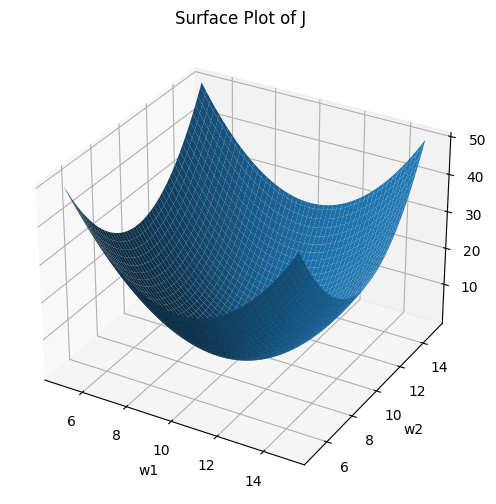

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def J(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# Generate data points and their values
w1 = np.linspace(5, 15, 100)
w2 = np.linspace(5, 15, 100)
w1, w2 = np.meshgrid(w1, w2)
J_val = J(w1, w2)

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, w2, J_val)
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('J')
ax.set_title('Surface Plot of J')
plt.show()


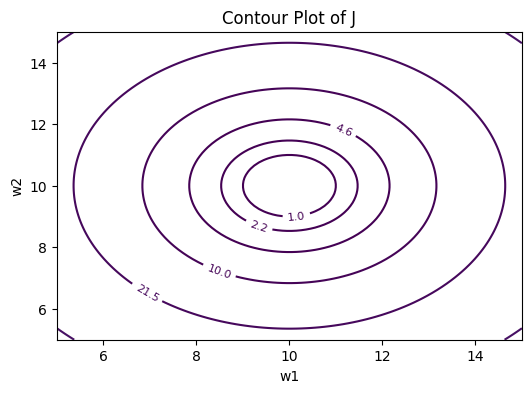

In [ ]:
# Generate data for contour plot
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
contour_levels = np.logspace(0, 3, 10)
contour_plot = ax.contour(w1, w2, J_val, levels=contour_levels, cmap='viridis')
plt.clabel(contour_plot, inline=True, fontsize=8)

# Labels
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Contour Plot of J')
plt.show()


3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given Function
def fun(w1, w2):
    return (w1 - 10)**2 + (w2 - 10)**2

# Gradient
def grad_fun(w1, w2):
    dw1 = 2 * (w1 - 10)
    dw2 = 2 * (w2 - 10)
    return np.array([dw1, dw2])

start_point = np.array([2,1])
search_direction = np.array([2,5])
alpha = 0
w_list = []
for _ in range(4):
  w = start_point + alpha*search_direction
  w_list.append(w)
  alpha += 1
w_list = np.array(w_list)
# Function wrt to alpha and given initial point and search direction
fun_alpha = lambda alpha: 29*alpha**2 - 122*alpha +145
grad_alpha = lambda alpha: 58*alpha - 122

# finding alpha that minimises J along the line using interval halving
alpha = interval_halving(fun_alpha, 1, 4)
min_val = fun_alpha(alpha)
x_star = start_point + alpha*search_direction
print(f"Min value of the function along the given search direction [2,5] is: {round(min_val,2)} at point x = {x_star}" )
print(f"alpha value for the min. value at given search direction = {round(alpha,2)}")

Min value of the function along the given search direction [2,5] is: 16.69 at point x = [ 6.20687866 11.51719666]
alpha value for the min. value at given search direction = 2.1


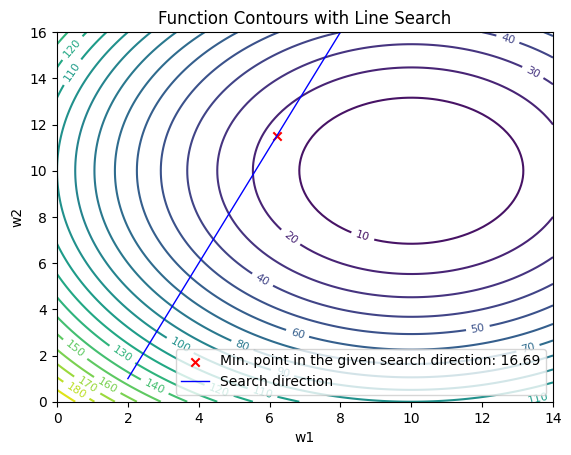

In [ ]:
# Points for plotting
w1 = np.linspace(0, 14, 100)
w2 = np.linspace(0, 16, 100)
w1, w2 = np.meshgrid(w1, w2)
z = fun(w1, w2)

# Plot the function and contours
contour_plot = plt.contour(w1, w2, z, levels=20, cmap='viridis')
plt.scatter(*x_star, c='red', marker='x', label=f'Min. point in the given search direction: {round(min_val,2)}')
plt.clabel(contour_plot, fontsize=8)
plt.plot(w_list[:,0], w_list[:,1], linestyle='-',linewidth=1, color='blue', label='Search direction')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.title('Function Contours with Line Search')
plt.show()
